In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import json
import glob
import random
import collections

import numpy as np
import pandas as pd
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")

import pydicom
from fastai.vision.all import *
np.random.seed(20210717)

In [4]:
path = Path('/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification')
path_train = path/'train'
path_test = path/'test'

train_df = pd.read_csv(path/'train_labels.csv')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [5]:
y_train = []
for i in range(len(train_df)):
    ref = train_df.loc[i, 'MGMT_value']
    y_train.append(ref)

In [6]:
count = 0
for i in range(len(y_train)):
    if(y_train[i]==1):
        count = count +1;
count

307

In [7]:
from glob import glob
df = pd.read_csv('/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')
la_train = df['MGMT_value'].to_numpy()
trn='/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/'
tst='/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/test/'
test= glob(tst+'*/')
train=glob(trn+'*/')
data = []
df = pd.DataFrame(data, columns=['BraTS21ID', 'MGMT_value'])

In [8]:
import cv2
def get_image12(i,k,a):
    #print(i)
    subf = glob(i+'*/')
    img = glob(subf[k]+'*')
    k = len(img)
    res = [[0]*128]*128
    for a in range(k) :
        dicom = pydicom.read_file(img[a])
        d = dicom.pixel_array.astype(np.float32)
        e = cv2.resize(np.array(d), dsize=(128, 128), interpolation=cv2.INTER_CUBIC) 
        res = res + np.array(e)
    rgb = cv2.resize(res, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)    
    return res.reshape(128, 128,1)

In [9]:
def get_image(i,k,a):
    subf = glob(a[i]+'*/')
    img = glob(subf[k]+'*')
    k = len(img)
    res = [[0]*128]*128
    for a in range(k) :
        dicom = pydicom.read_file(img[a])
        d = dicom.pixel_array.astype(np.float32)
        e = cv2.resize(np.array(d), dsize=(128, 128), interpolation=cv2.INTER_CUBIC) 
        res = res + np.array(e)
    rgb = cv2.resize(res, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)    
    return res.reshape(128, 128,1)

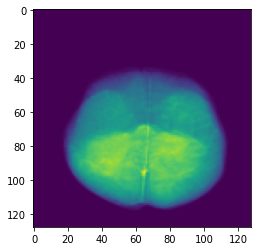

In [10]:
def get_tar(k , a) :
    img =  get_image(k,1,a) + get_image(k,2,a) + get_image(k,3,a) + get_image(k,0,a) 
    return img
img = get_tar(3,train )
plt.imshow(img)


In [11]:
def get_te(k , a) :
    img = get_image12(k,1,a) + get_image12(k,0,a)  + get_image12(k,2,a) + get_image12(k,3,a)
    return img


(128, 128, 1)

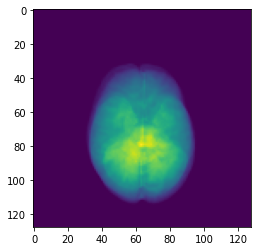

In [12]:
img = get_tar(50,test )
plt.imshow(img)
np.shape(img)

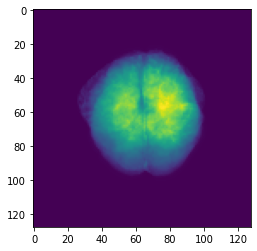

In [13]:

import keras
from keras.utils import to_categorical

# One hot vector representation of labels
yy_labels = to_categorical(la_train)
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
x_train = train[:540]
x_val = train[540:585]
y_train = yy_labels[:540]
y_val = yy_labels[540:585]
img = get_tar(44,x_val )
plt.imshow(img)

In [14]:
class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename, labels, batch_size) :
    self.filename = filename
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x])/255.0, np.array(batch_y)

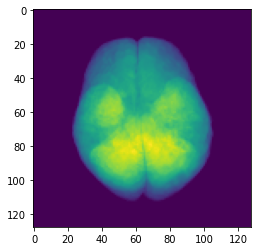

In [15]:
batch_size = 32

my_training_batch_generator = My_Custom_Generator(x_train, y_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(x_val, y_val, batch_size)
img = get_tar(200,x_train )
plt.imshow(img)

In [16]:
#x = my_training_batch_generator.__getitem__(3)

In [17]:
len(x[0][0])

NameError: name 'x' is not defined

In [ ]:
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize

import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = Sequential()
model.add(Conv2D(1, kernel_size=20, activation="relu", input_shape=(128, 128,1)))
model.add(Conv2D(1, kernel_size=20, activation="relu"))
model.add(Flatten())
model.add(Dense(512, activation="relu", name="layer1"))
model.add(Dense(32, name="layer2"))
model.add(Dense(2, activation = "softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit_generator(generator=my_training_batch_generator,
                   steps_per_epoch = int(540 // batch_size),
                   epochs = 2,
                    verbose = 1,
                   validation_data = my_validation_batch_generator,
                    validation_steps = int(45 // batch_size))
                   

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

#model.save("initial_model.h5")

In [ ]:
a = get_tar(500000,train)
plt.imshow(a)

In [ ]:
!nvidia-smi